<a href="https://colab.research.google.com/github/mathewspmathew/E-Commerce-Data-Cleaning-Olist-Dataset/blob/main/Olist_Datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# just loading the relevant data to the notebook

In [4]:
items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/olist_products_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/olist_customers_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/olist_order_reviews_dataset.csv')
category_translation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/product_category_name_translation.csv')
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/olist datasets/olist_order_payments_dataset.csv')

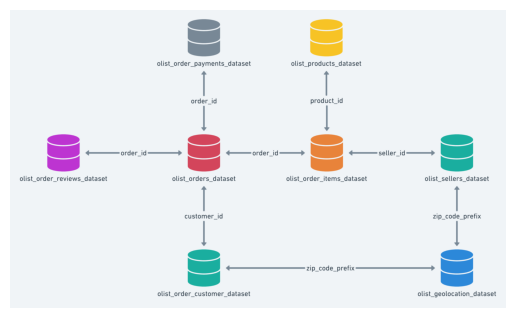

In [5]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/olist datasets/schema.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# this is a schma of the csv files

## Here we are going to do merging opertion.
merging all to a dataset df

In [6]:
df = orders.merge(items, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(customers, on='customer_id', how='left')
df = df.merge(reviews, on='order_id', how='left')
df = df.merge(payments, on='order_id', how='left')
df = df.merge(category_translation, on='product_category_name', how='left')

In [7]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,auto


In [8]:
print(df.isnull().sum())
# total null values per row

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


In [9]:
print(df.duplicated().sum())
# if duplicated rows are found

0


Initial exploration is done above
Now we are going to do basic missing values removal. Here the full row is removed.

In [10]:
# we can handle missing values using basic steps
df['review_score'] = df['review_score'].fillna(df['review_score'].median())

In [11]:
df['product_category_name_english'] = df['product_category_name_english'].fillna('Unknown')

In [12]:
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].fillna(df['order_delivered_customer_date'].mode()[0])

In [13]:
df = df.dropna(subset=['order_id','customer_id','price'])

In [14]:
df = df.drop_duplicates()

In [15]:
print(df.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118310 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118310 non-null  object        
 1   customer_id                    118310 non-null  object        
 2   order_status                   118310 non-null  object        
 3   order_purchase_timestamp       118310 non-null  datetime64[ns]
 4   order_approved_at              118295 non-null  object        
 5   order_delivered_carrier_date   117056 non-null  object        
 6   order_delivered_customer_date  118310 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118310 non-null  object        
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  shipp

## going to stardardize format - date and titles
here coerce means make the wrong formats into Nan values rather than popping up errors

In [16]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],errors='coerce')

In [17]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'],errors='coerce')

In [18]:
df['customer_city'] = df['customer_city'].str.title()

In [23]:
df['product_category_name_english'] = df['product_category_name_english'].str.title()

## Understanding the outliers
basically understanding the distribution of price and how it is varied

In [35]:
print("Min price:", df['price'].min())
print("Max price:", df['price'].max())

print(df['price'].quantile([0.25,0.5,0.75,0.99,1.0]))

Min price: 0.85
Max price: 895.0
0.25     39.900
0.50     72.900
0.75    129.990
0.99    628.971
1.00    895.000
Name: price, dtype: float64


In [39]:
price_threshold = df['price'].quantile(0.99)
# df = df[df['price']<= price_threshold] this creates just a filter that avoids that price range. so we are going to create a copy of df and assign it to df as it rewrites
df = df[df['price']<= price_threshold].copy()

## feature engineering
here total amount paid by the customer is found by adding freight_value and price.

In [40]:
df['total_order_value'] = df['price'] + df['freight_value']

## we are going to create another dataframe customer rmf
Recency : How recently a customer made a purchase,
Frequency : How often they purchased,
Monetary : How much they spend in total.


In [55]:
#reference point to calculate recency. most recent order + 1 day
snapshot_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days= 1)

#creating new dataframe
customer_rmf = df.groupby('customer_id').agg({
    'order_purchase_timestamp' : lambda x: (snapshot_date - x.max()).days,
    'order_id' : 'count',
    'total_order_value' : 'sum'
})# here we have found recency, frequence, monetary
# renaming because we want to understand
customer_rmf = customer_rmf.rename(columns = {
    'order_purchase_timestamp':'recency',
    'order_id':'frequency',
    'total_order_value': 'monetary'
})
customer_rmf = customer_rmf.reset_index()

In [57]:
customer_rmf.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,293,1,114.74
1,000161a058600d5901f007fab4c27140,414,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,552,1,195.42
3,0002414f95344307404f0ace7a26f1d5,383,1,179.35
4,000379cdec625522490c315e70c7a9fb,154,1,107.01


## inactive customers
finding customers who are inactive for 180 days (3 months)

In [58]:
customer_rmf['churn'] = customer_rmf['recency']>180

merging back to main df

In [65]:
df = df.merge(customer_rmf[['customer_id','recency','frequency','monetary','churn']],on='customer_id',how = 'left')

In [66]:
# cleaned data download
df.to_csv('cleaned_olist_data.csv')

In [67]:
# files.download('cleaned_olist_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>